In [33]:
# Set up

import spaudiopy as spa
import pyfar as pf
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import soundfile as sf
import glob
import os

# set up paths
in_dir = "../Raw Data/Applied Acoustics/Applied Acoustics/"
folders = os.listdir(in_dir)

# select target folder
folder = folders[2]

# resulting path
folder_path = in_dir + folder + "/"

# load HOA (Higher order ambisonics)

HOA_paths = glob.glob(folder_path + "HOA\*.wav")
HOA_paths = sorted(HOA_paths)


HOAS = spa.io.load_audio(HOA_paths)

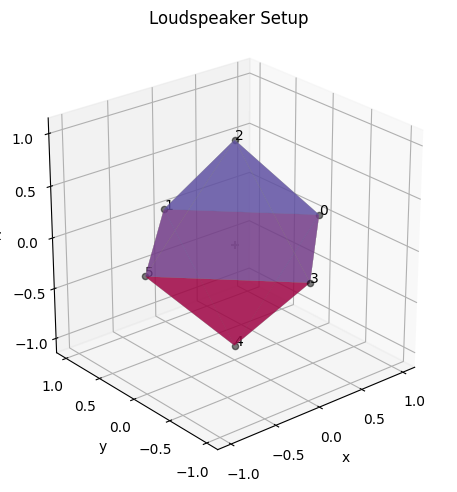

In [34]:
# Definition von Variablen 
fs = 44100

# Definition der Evaluationszeiträume
tl = 15
tu = 100

tl = round((tl*(10**(-3)))*fs)
tu = round((tu*(10**(-3)))*fs)

# Berechnung der Schalleinfallsrichtungen + Energien über LS:

# Definition des Lautsprechersetups
ls_setup = spa.decoder.LoudspeakerSetup([1,0,0,0,0,-1], [0,1,0,-1,0,0], [0,0,1,0,-1,0])
ls_setup.ambisonics_setup()
ls_setup.ambisonics_hull.show()


In [35]:
# Decoden des Ambisonics-Signals in Einzelsignale
ls_sig = spa.decoder.allrad(HOAS.get_signals(), ls_setup, 3)

def calc_TS_TH(ls_sig, tl, tu):
    # Berechnung der Richtungsenergien
    front = sum(ls_sig[0, tl:tu])
    back = sum(ls_sig[5, tl:tu])
    top = sum(ls_sig[2, tl:tu])
    left = sum(ls_sig[1, tl:tu])
    right = sum(ls_sig[3, tl:tu])


    # Beschreibung des Parameters

    # TS - Top/Sides(left,right)

    TS = 20*np.log10((top)/(left + right))
    print('TS = ' + str(TS))

    # TH - Top/Horizontal(left,right,back)

    TH = 20*np.log10((top)/(left + right + back))
    print('TH = ' + str(TH))

# TODO Decoder vergleichen (allrad, etc.)



In [37]:
decoder_list = ["allrad", "allrad2", "sad", "mad", "epad"]

decoded_ls_signals = []
decoded_ls_signals.append(spa.decoder.allrad(HOAS.get_signals(), ls_setup, 3))
decoded_ls_signals.append(spa.decoder.allrad2(HOAS.get_signals(), ls_setup, 3))
decoded_ls_signals.append(spa.decoder.sad(HOAS.get_signals(), ls_setup, 3))
decoded_ls_signals.append(spa.decoder.mad(HOAS.get_signals(), ls_setup, 3))
decoded_ls_signals.append(spa.decoder.epad(HOAS.get_signals(), ls_setup, 3))

for name, ls_sig in zip(decoder_list, decoded_ls_signals):
    print(name)
    calc_TS_TH(ls_sig, tl, tu)
    print("")

allrad
TS = -15.945570213697973
TH = -18.64526308813011

allrad2
TS = -12.424396289497189
TH = -15.511971233891973

sad
TS = nan
TH = nan

mad
TS = -25.166818666975015
TH = -25.572699403911688

epad
TS = nan
TH = nan



c:\Users\fulbr\.conda\envs\projVAR\Lib\site-packages\spaudiopy\decoder.py:1233: UserWarning: EPAD needs more loudspeakers for this N_sph! (6 < 16)
  warn('EPAD needs more loudspeakers for this N_sph!'
C:\Users\fulbr\AppData\Local\Temp\ipykernel_17956\1910023783.py:17: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))
C:\Users\fulbr\AppData\Local\Temp\ipykernel_17956\1910023783.py:22: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))


Sehr verschiedene Ergebnisse für die Decoder :(

EPAD (Energy preserving ambisonics decoder = optimal) funktioniert nur ab 16 LS aufwärts --> dann wirds spannend wir man front / side usw. definert. :(

--> insgesamt 2 traurige smileys